<h1 style="background-color:#018023;color:white;padding:10px 0 10px 10px;">Import Necessary Libraries</h1>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<img src="image.jpg" width="60%" height="auto">

In [95]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


**Rename columns to easy the process of Data Cleaning or Preprocessing**

In [96]:
df.rename(columns={"test_score(out of 10)":"test_score","interview_score(out of 10)":"interniew_score","salary($)":"salary"},inplace=True)

<h1 style="background-color:#018023;color:white;padding:10px 0 10px 10px;">Data Preprocessing</h1>

In [97]:
median_test_score = df.test_score.median()
median_test_score

8.0

In [98]:
df['test_score'] = df['test_score'].fillna(median_test_score)

In [99]:
df

,experience,test_score,interniew_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [100]:
df['experience'] = df['experience'].fillna('zero')

In [101]:
df

,experience,test_score,interniew_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


**This module 'word2number' will convert words counting into numbers counting format**

In [102]:
!pip install word2number

In [103]:
from word2number import w2n
df['experience'] = df['experience'].apply(w2n.word_to_num)

In [104]:
df

,experience,test_score,interniew_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [105]:
x = df.drop('salary',axis=1)
y = df['salary']

<h1 style="background-color:#018023;color:white;padding:10px 0 10px 10px;">Training Model</h1>

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.40)

In [107]:
x_train

,experience,test_score,interniew_score
5,3,7.0,10
6,10,8.0,7
4,7,9.0,6
0,0,8.0,9


In [108]:
x_test

,experience,test_score,interniew_score
1,0,8.0,6
3,2,10.0,10
2,5,6.0,7
7,11,7.0,8


In [109]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [110]:
prediction = model.predict(x_test)
prediction

array([52333.33333333, 56355.55555556, 64066.66666667, 77077.77777778])

In [111]:
model.coef_

array([2211.11111111, -311.11111111,   55.55555556])

In [112]:
model.intercept_

54488.88888888888

**Predict locally**

In [114]:
model.predict([[12,10,10]])

C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([78466.66666667])

**Mean Squared Error**

In [115]:
print("Mean square error")
print("--"*40)
mse = mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)
print("Mean error : ",mse)
print("Root : ",rmse)

Mean square error
--------------------------------------------------------------------------------
Mean error :  38395339.50617282
Root :  6196.397300542697


In [116]:
result = np.column_stack((y_test,prediction))
print("Actual values | Predicted values")
print("--"*40)
for actual,predicted in result:
    print(f"{actual:7.1f} | {predicted:7.1f}")


Actual values | Predicted values
--------------------------------------------------------------------------------
45000.0 | 52333.3
65000.0 | 56355.6
60000.0 | 64066.7
80000.0 | 77077.8


In [117]:
residual = actual-prediction.reshape(-1)
print(residual)

[27666.66666667 23644.44444444 15933.33333333  2922.22222222]


## By visualization : draw the regression line to see that predicted points are how much close to the regression line

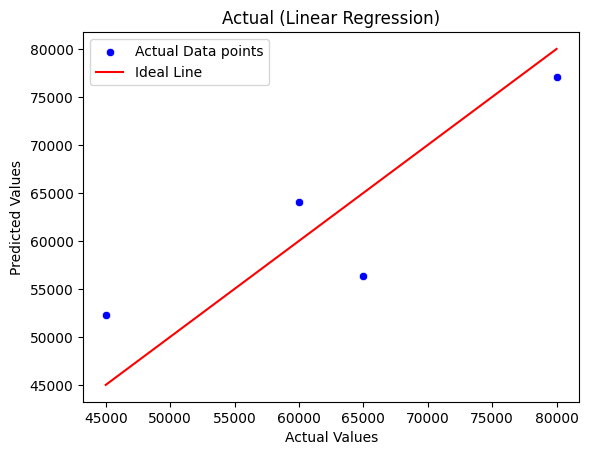

In [118]:
import seaborn as sns

sns.scatterplot(x=y_test, y=prediction, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual (Linear Regression)')
plt.legend()
plt.show()